In [16]:
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
!ls ../../../data/out_metrics/*202412*lay_act*12_16*

../../../data/out_metrics/results_20241203_125550_lay_act_12_16.pkl
../../../data/out_metrics/results_20241204_084350_lay_act_12_16.pkl
../../../data/out_metrics/results_20241205_070611_lay_act_12_16.pkl


In [17]:
files = ['../../../data/out_metrics/results_20241203_032637_lay_act_0_4.pkl',
         '../../../data/out_metrics/results_20241205_005016_lay_act_1_4.pkl',
         '../../../data/out_metrics/results_20241203_202938_lay_act_4_8.pkl',
        '../../../data/out_metrics/results_20241204_221044_lay_act_7_8.pkl',
        '../../../data/out_metrics/results_20241204_093241_lay_act_8_12.pkl',
         '../../../data/out_metrics/results_20241205_070611_lay_act_12_16.pkl',
         '../../../data/out_metrics/results_20241205_055849_lay_act_16_20.pkl',
         '../../../data/out_metrics/results_20241205_111243_lay_act_20_22.pkl',
        ]

In [18]:
all_results = dict()
for file_name in files:
    with open(file_name, "rb") as file:
        results = dict(pickle.load(file))
    all_results = {**all_results, **results}
    
all_results

{(50000,
  'default',
  1): [[9.962,
   13.082,
   61.112,
   81.656,
   91.472,
   93.596,
   93.726,
   93.852,
   93.83,
   93.844,
   93.848,
   93.834,
   93.846,
   93.874,
   93.84,
   93.838,
   93.848,
   93.83,
   93.822,
   93.872,
   93.84,
   93.86,
   93.844,
   93.862,
   93.858,
   93.842,
   93.846,
   93.86,
   93.822,
   93.874,
   93.884,
   93.854,
   93.872,
   93.86,
   93.86,
   93.87,
   93.876,
   93.856,
   93.812,
   93.87,
   93.894,
   93.868,
   93.84,
   93.848,
   93.854,
   93.91,
   93.806,
   93.842,
   93.808,
   93.856,
   93.81,
   93.862,
   93.824,
   93.822,
   93.852,
   93.826,
   93.874,
   93.816,
   93.824,
   93.856,
   93.854,
   93.894,
   93.87,
   93.862,
   93.884,
   93.84,
   93.88,
   93.804,
   93.828,
   93.898,
   93.906,
   93.85,
   93.842,
   93.862,
   93.796,
   93.852,
   93.904,
   93.804,
   93.826,
   93.89,
   93.908,
   93.914,
   93.832,
   93.84,
   93.866,
   93.832,
   93.888,
   93.832,
   93.884,
   93.88,
   9

/home/I6356345/anaconda3/envs/p37/lib/python3.7/site-packages/ipykernel_launcher.py:41: UserWarning: 
The palette list has fewer values (1) than needed (2) and will cycle, which may produce an uninterpretable plot.


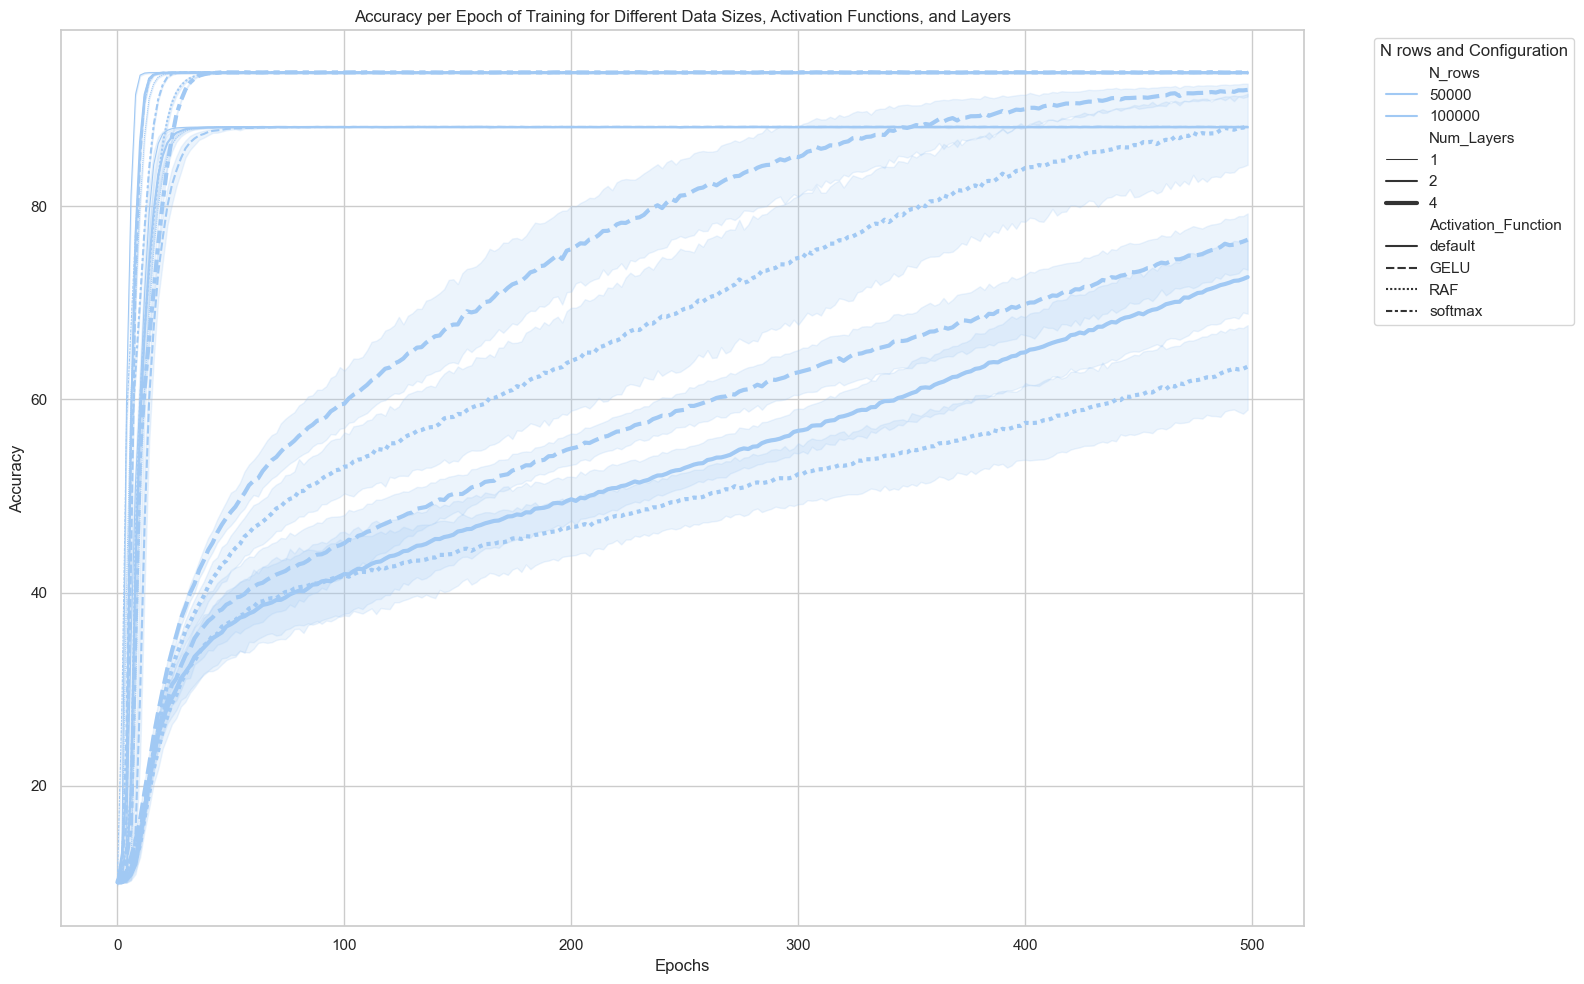

In [19]:
# Flatten the data while preserving the structure from the tuple keys
flattened_data = {
    "N_rows": [],
    "Activation_Function": [],
    "Num_Layers": [],
    "Iteration": [],
    "epochs": [],
    "Values": []
}

# Iterate over each dataset size, activation function, and number of layers
for (n_rows, act_fn, n_layers), list_of_iterations in all_results.items():
    # For each iteration in the dataset size
    for i, iteration_list in enumerate(list_of_iterations):
        # Flatten the iteration list with epochs multiplied by 2 (0, 2, 4, ..., 18)
        for epoch, value in enumerate(iteration_list):
            flattened_data["N_rows"].append(n_rows)
            flattened_data["Activation_Function"].append(act_fn)
            flattened_data["Num_Layers"].append(n_layers)
            flattened_data["Iteration"].append(i)
            flattened_data["epochs"].append(epoch * 2)
            flattened_data["Values"].append(value)

# Convert to DataFrame for plotting
results_melted = pd.DataFrame(flattened_data)

# Set Seaborn style and pastel color palette for unique combinations
sns.set(style="whitegrid")
palette = sns.color_palette("pastel", n_colors=len(results))

# Plot with Seaborn, using both N_rows, Activation_Function, and Num_Layers as identifiers
plt.figure(figsize=(16, 10))
sns.lineplot(
    data=results_melted,
    x="epochs",
    y="Values",
    hue="N_rows",
    style="Activation_Function",
    size="Num_Layers",
    palette=palette,
    linewidth=1,
)

# Add labels and legend
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy per Epoch of Training for Different Data Sizes, Activation Functions, and Layers")
plt.legend(title="N rows and Configuration", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

In [22]:
pd.DataFrame(all_results).T

0  \
50000  default 1  [28293.206, 109179.548, 75182.17, 53507.512, 9...   
               2  [-2.0225006731299118e+18, -2.0328724714537165e...   
               4  [79366.068, -1.888161391812481e+18, 62654.064,...   
       GELU    1  [3318.456, 3543.876, 3461.058, 3463.646, 3449....   
               2  [3.417683901945221e+18, 1.6957306316557489e+18...   
               4  [4974.548, 7776.688, 8242.59, 40861.906, 16903...   
       RAF     1  [9.94, 11.91, 42.884, 61.012, 71.416, 81.394, ...   
               2  [9.938, 10.606, 12.448, 18.244, 40.616, 57.986...   
               4  [9.938, 9.938, 10.986, 13.084, 15.492, 17.79, ...   
       softmax 1  [10.3, 23.528, 57.28, 67.298, 77.078, 85.626, ...   
               2  [9.926, 11.444, 21.946, 54.708, 62.304, 69.5, ...   
               4  [9.938, 10.734, 12.192, 15.68, 37.8, 53.874, 6...   
100000 default 1  [123890.771, 136078.117, 122265.173, 122937.10...   
               2  [151908.602, 48891.488, 122383.819, 122132.707...   
               4  [122409.002, 617.515, 122223.958, 122293.99, 1...   
       GELU    1  [9.933, 9.934, 9.917, 10.013, 39.865, 54.281, ...   
               2  [9.934, 9.934, 10.189, 11.558, 16.716, 35.092,...   
               4  [9.934, 9.934, 11.081, 12.064, 12.751, 15.168,...   
       RAF     1  [9.934, 9.934, 10.053, 27.864, 50.297, 57.763,...   
               2  [9.934, 9.934, 9.934, 9.979, 10.247, 12.353, 1...   
               4  [9.934, 10.066, 9.934, 10.805, 12.104, 13.548,...   
       softmax 1  [10.391, 44.44, 55.649, 65.524, 75.072, 82.086...   
               2  [9.814, 11.441, 33.72, 54.028, 61.754, 69.249,...   
               4  [9.958, 10.638, 12.334, 21.972, 44.983, 53.869...   

                                                                  1  \
50000  default 1  [76117.366, 75936.352, 66530.796, 66273.944, 6...   
               2  [129774.966, 107855.814, 71862.424, 103531.976...   
               4  [54530.136, 51849.874, 82516.2, 90215.408, 926...   
       GELU    1  [3420.66, 3532.308, 3507.806, 3532.806, 3412.1...   
               2  [37159.228, 73399.24, 69246.812, 22361.532, 87...   
               4  [71893.26, 1.690692449622993e+18, 61333.854, 1...   
       RAF     1  [10.19, 11.496, 38.658, 61.418, 71.296, 81.272...   
               2  [10.184, 11.424, 13.792, 20.246, 46.52, 60.176...   
               4  [10.184, 10.184, 10.18, 12.118, 14.746, 16.784...   
       softmax 1  [10.636, 32.42, 58.516, 68.376, 78.816, 86.75,...   
               2  [10.234, 11.566, 24.088, 55.482, 62.622, 69.98...   
               4  [10.172, 10.914, 12.514, 15.958, 36.584, 54.06...   
100000 default 1  [107883.994, 94889.218, 86812.018, 84087.607, ...   
               2  [123710.163, 18350.604, 51305.433, 42522.907, ...   
               4  [119069.315, 20774.551, 42421.007, 97132.845, ...   
       GELU    1  [10.068, 10.068, 10.046, 10.096, 40.107, 52.68...   
               2  [10.068, 10.068, 10.126, 11.212, 17.131, 34.64...   
               4  [10.068, 10.068, 10.459, 12.603, 15.463, 18.70...   
       RAF     1  [10.068, 10.067, 10.001, 12.821, 47.185, 57.47...   
               2  [10.068, 10.068, 10.069, 9.985, 12.898, 17.671...   
               4  [10.068, 10.068, 10.073, 10.347, 11.879, 12.91...   
       softmax 1  [10.4, 44.979, 55.553, 65.453, 75.148, 82.018,...   
               2  [10.057, 11.65, 38.96, 54.252, 61.137, 68.12, ...   
               4  [10.068, 10.671, 12.165, 18.848, 44.487, 53.57...   

                                                                  2  \
50000  default 1  [50139.908, 30763.95, 90304.838, 56204.102, 77...   
               2  [63321.65, 25093.618, 46626.534, 46628.53, 369...   
               4  [53530.62, 108169.326, 90723.356, 102030.572, ...   
       GELU    1  [3318.12, 3318.12, 3318.12, 3318.12, 3318.12, ...   
               2  [70039.956, 81756.038, 68081.054, 76432.102, 8...   
               4  [47333.226, 1.676881887229589e+18, 55598.736, ...   
       RAF     1 

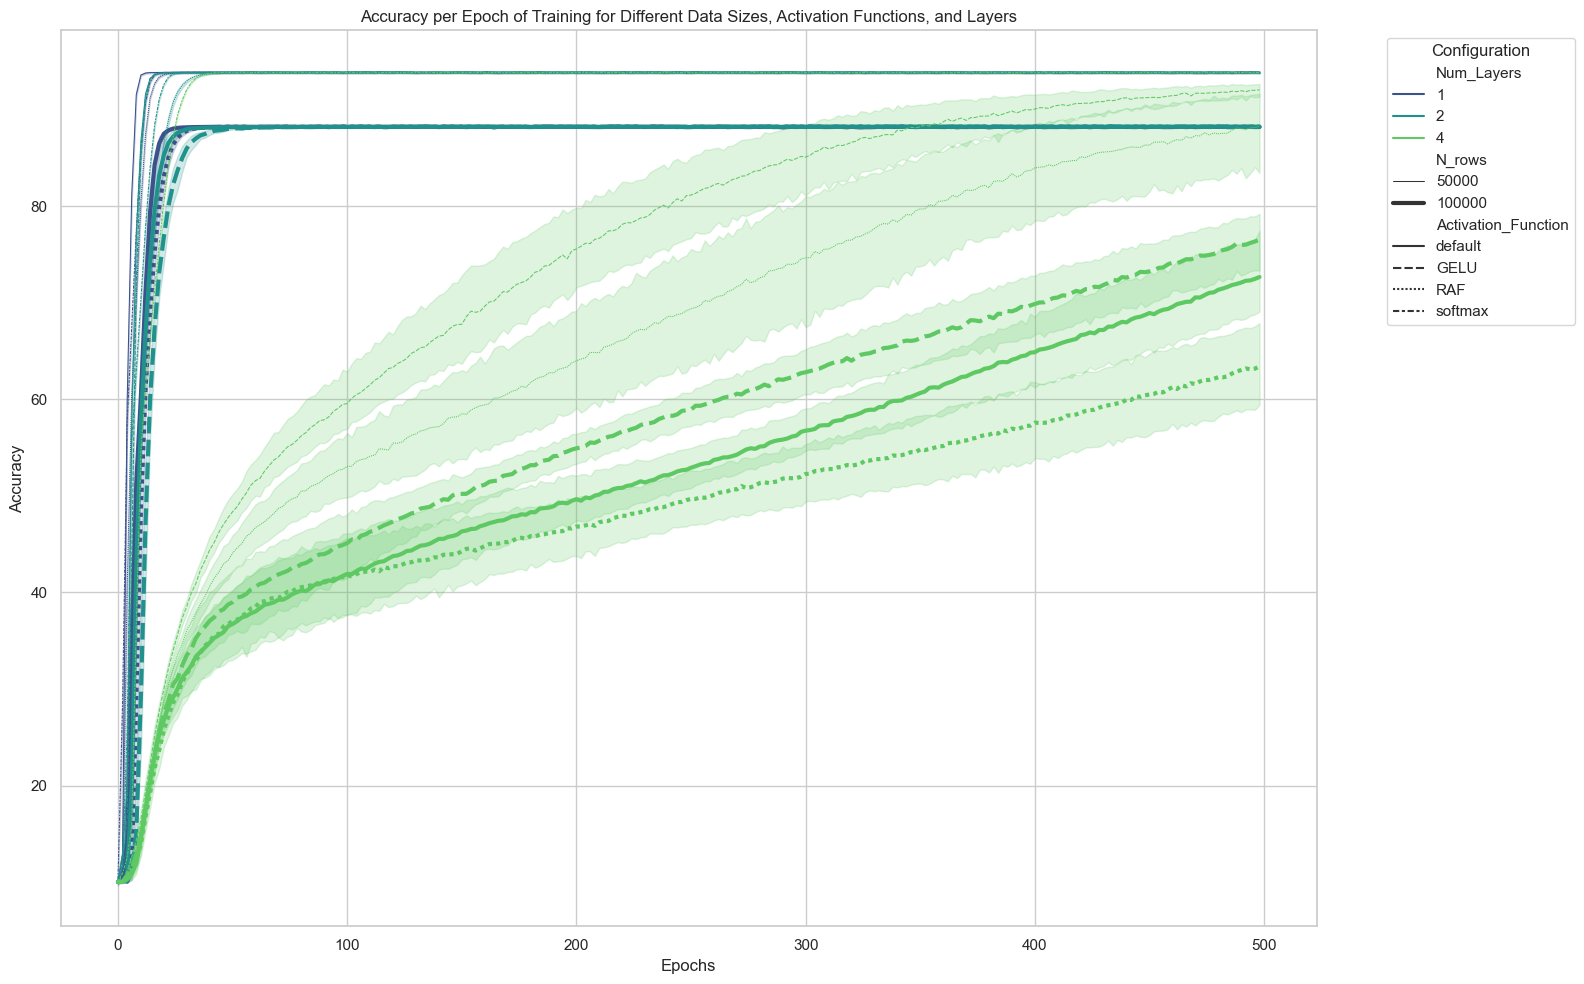

In [20]:
# Generate unique colors for each Num_Layers value
unique_layers = results_melted['Num_Layers'].unique()
layer_palette = sns.color_palette("viridis", len(unique_layers))
layer_color_map = {layer: color for layer, color in zip(unique_layers, layer_palette)}

# Plot with Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(16, 10))

sns.lineplot(
    data=results_melted,
    x="epochs",
    y="Values",
    hue="Num_Layers",  # Different colors for different Num_Layers
    style="Activation_Function",
    size="N_rows",
    palette=layer_color_map,  # Custom palette mapped to Num_Layers
    linewidth=1,
)

# Add labels and legend
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy per Epoch of Training for Different Data Sizes, Activation Functions, and Layers")
plt.legend(title="Configuration", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()